## Setup & Data upload

In [1]:
import os
import sys
#mother_path = '/home/lfaivish/PycharmProjects/Deepshit/'
#sys.path.insert(0, mother_path)
print(sys.executable)


import time
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import pywt
#from Important_Function_For_Deep.xgboost_from_gilad import XGBoost_Classifier2
from future.utils import lmap
import matplotlib.pyplot as plt

from Utils import Utils as ut
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from os.path import join
print("Step 1 done")
###################################################################################

ALLDATA = spark.read.format("com.databricks.spark.csv") \
.option("header", "True") \
.option("delimiter", ",") \
.load("s3n://intel-health-analytics/notebooks/analytics_layer_demo/SessionSignal.csv") 

XXX = spark.read.format("com.databricks.spark.csv") \
.option("header", "False") \
.option("delimiter", ",") \
.load("s3n://intel-health-analytics/notebooks/analytics_layer_demo/rawX.csv") 

YYY = spark.read.format("com.databricks.spark.csv") \
.option("header", "False") \
.option("delimiter", ",") \
.load("s3n://intel-health-analytics/notebooks/analytics_layer_demo/rawY.csv") 

ZZZ = spark.read.format("com.databricks.spark.csv") \
.option("header", "False") \
.option("delimiter", ",") \
.load("s3n://intel-health-analytics/notebooks/analytics_layer_demo/rawZ.csv") 

XXX = XXX.toPandas()
YYY = YYY.toPandas()
ZZZ = ZZZ.toPandas()

XXX = XXX.as_matrix()
XXX  =  XXX[1:,range(1,251)]
YYY = YYY.as_matrix()
YYY  =  YYY[1:,range(1,251)]
ZZZ = ZZZ.as_matrix()
ZZZ  =  ZZZ[1:,range(1,251)]

XXX = XXX.astype('float')
YYY = YYY.astype('float')
ZZZ = ZZZ.astype('float')

ALLDATA = ALLDATA.toPandas()

meta = spark.read.format("com.databricks.spark.csv") \
.option("header", "True") \
.option("delimiter", ",") \
.load("s3n://intel-health-analytics/notebooks/analytics_layer_demo/metadata.csv") 
meta = meta.toPandas()

print("Step 2 done")
###################################################################################

lhs = spark.read.format("com.databricks.spark.csv") \
.option("header", "True") \
.option("delimiter", ",") \
.load("s3n://intel-health-analytics/notebooks/analytics_layer_demo/w_lft_rawa1.csv") 

rhs = spark.read.format("com.databricks.spark.csv") \
.option("header", "True") \
.option("delimiter", ",") \
.load("s3n://intel-health-analytics/notebooks/analytics_layer_demo/w_rt_rawb1.csv") 

lhs = lhs.toPandas()
rhs = rhs.toPandas()

lhs = lhs.loc[range(10000)]
rhs = rhs.loc[range(10000)]
print("Step 3 done")
###################################################################################

print("Projection of tag data to 2 dim")
exec(open('Important_Function_For_Deep/FunctionForPredWithDEEP.py').read())
XYZ = np.stack((XXX,YYY,ZZZ),axis=2)
XYZ = np.reshape(XYZ,(np.shape(XYZ)[0],np.shape(XYZ)[1]*np.shape(XYZ)[2]))
HR = map(projGrav,XYZ)
print("Step 4 done")
###################################################################################

ver = spark.read.format("com.databricks.spark.csv") \
.option("header", "False") \
.option("delimiter", ",") \
.load("s3n://intel-health-analytics/notebooks/analytics_layer_demo/ver.csv") 
print("Step 5 done")
print(time.ctime())

/usr/bin/python


ImportError: No module named pandas

## Data preview

In [ ]:
pd.DataFrame(ALLDATA[['TS','X','Y','Z']]).head()

## Converting data into 5 seconds intervals (X only)

In [3]:
pd.DataFrame(XXX).head()

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,0.032816,0.053174,0.044947,0.037274,0.028767,0.063863,0.022921,-0.020086,0.030053,-0.005639,...,0.068920,0.052048,0.052894,0.052864,0.041137,0.064037,0.056042,0.053751,0.041289,0.057273
1,0.027461,0.035294,0.007536,0.013581,0.002746,0.021254,0.031005,0.031742,0.036843,0.009129,...,0.027004,0.011574,0.004802,0.009672,0.036854,0.048261,0.044580,0.020460,0.035674,-0.019035
2,0.045049,0.059846,0.064232,0.048969,0.045856,0.044544,0.006455,0.006114,-0.033472,-0.035257,...,0.068247,0.075910,0.060436,0.089474,0.079343,0.065876,0.134781,0.165606,0.175683,0.146339
3,-0.036966,-0.029249,-0.041528,-0.030614,-0.029880,-0.042793,-0.033573,0.002032,0.005194,0.013124,...,0.103209,0.099182,0.098066,0.090640,0.082341,0.128224,0.103935,0.055783,0.085866,0.079611
4,0.156015,0.137335,0.152890,0.135824,0.131248,0.123936,0.165866,0.161983,0.178436,0.195100,...,0.060373,0.045859,0.031337,0.022369,0.056054,0.049112,0.055624,0.050869,0.052071,0.048969


## Meta data (L-Dopa trial)

In [19]:
meta[['Task','BradykinesiaGA','DyskinesiaGA','TremorGA','TSStart', 'TSEnd']].drop_duplicates().reset_index().head()

,index,Task,BradykinesiaGA,DyskinesiaGA,TremorGA,TSStart,TSEnd
0,0,Sitting,None,1,0,2014-11-14 12:26:30.500,2014-11-14 12:27:00.500
1,10,Rest finger to nose,None,0,0,2014-11-14 12:27:36.500,2014-11-14 12:28:08.500
2,20,Active finger to nose,0.0,0,0,2014-11-14 12:28:55.500,2014-11-14 12:29:28.500
3,31,Sit to stand,0.0,1,0,2014-11-14 12:30:25.500,2014-11-14 12:30:58.500
4,42,Standing,None,1,0,2014-11-14 12:31:39.500,2014-11-14 12:32:17.500


## Data size & preview

In [20]:
print("size of unlabeled data is " + str("{:,}".format(len(ver.columns)*ver.select("_c17").distinct().count())))
print("size of labeled data is " + str("{:,}".format(len(XXX.flatten()))))

size of unlabeled data is 41,562,500
size of labeled data is 9,415,500


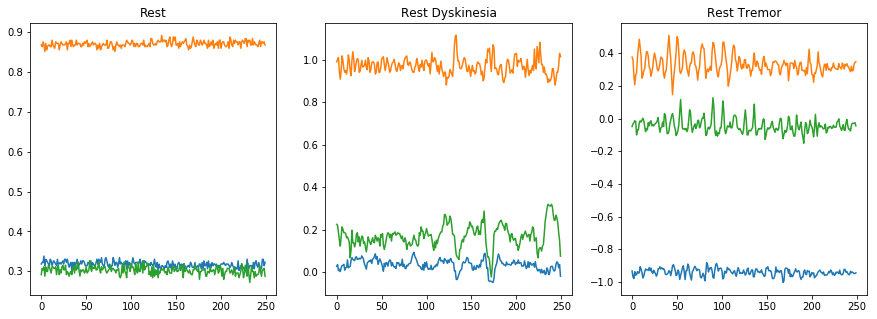

In [21]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
axs[0].plot(XXX[2141])
axs[0].plot(YYY[2141])
axs[0].plot(ZZZ[2141])
axs[0].set_title("Rest")
axs[1].plot(XXX[1])
axs[1].plot(YYY[1])
axs[1].plot(ZZZ[1])
axs[1].set_title("Rest Dyskinesia")
axs[2].plot(XXX[13155])
axs[2].plot(YYY[13155])
axs[2].plot(ZZZ[13155])
axs[2].set_title("Rest Tremor")
plt.show()

## Sensor Sync

In [22]:
lhs.user = lhs.iloc[1][0]
lhs.columns = ['a', 'b', 'ts', 'c', 'x', 'y', 'z']
lhs.drop(['a', 'b', 'c'], axis=1, inplace=True)
lhs['x'] = lhs['x'].str.replace('{x=', '')
lhs['y'] = lhs['y'].str.replace('y=', '')
lhs['z'] = lhs['z'].str.replace('z=', '')
lhs['z'] = lhs['z'].str.replace('}', '')
#
# set types
lhs['x'] = lhs['x'].astype('float')
lhs['y'] = lhs['y'].astype('float')
lhs['z'] = lhs['z'].astype('float')
lhs['ts'] = pd.to_datetime(lhs.loc[:, 'ts'])

rhs.user = rhs.iloc[1][0]
rhs.columns = ['a', 'b', 'ts', 'c', 'x', 'y', 'z']
rhs.drop(['a', 'b', 'c'], axis=1, inplace=True)
rhs['x'] = rhs['x'].str.replace('{x=', '')
rhs['y'] = rhs['y'].str.replace('y=', '')
rhs['z'] = rhs['z'].str.replace('z=', '')
rhs['z'] = rhs['z'].str.replace('}', '')
#
# set types
rhs['x'] = rhs['x'].astype('float')
rhs['y'] = rhs['y'].astype('float')
rhs['z'] = rhs['z'].astype('float')
rhs['ts'] = pd.to_datetime(rhs.loc[:, 'ts'])

lhs['n'] = (lhs['x'] ** 2 + lhs['y'] ** 2 + lhs['z'] ** 2) ** 0.5
rhs['n'] = (rhs['x'] ** 2 + rhs['y'] ** 2 + rhs['z'] ** 2) ** 0.5

In [23]:
lhs_shake_range = range(3000, 4000)
rhs_shake_range = range(2000, 3000)
a = lhs.loc[lhs_shake_range, 'n'].as_matrix()
b = rhs.loc[rhs_shake_range, 'n'].as_matrix()

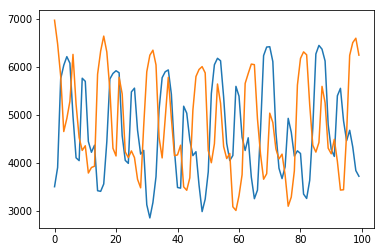

In [25]:
plot_with_shift = True
idx_st = 500;  idx_en = 600

#fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
plt.plot(a[range(idx_st, idx_en)])
plt.plot(b[range(idx_st, idx_en)])
plt.show()

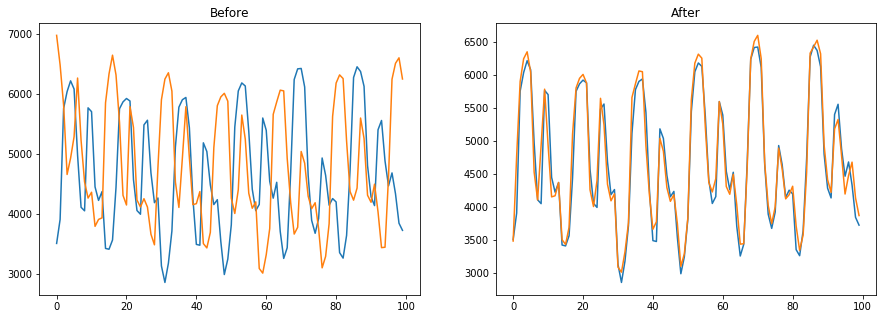

In [26]:
# The shake was done using 2 not synchronized pebble watches.
# Read data***************************
#common_path = join('/home/lfaivish', 'DataScientists', 'BiogenExamples')
#lhs = ut.read_export_tool_csv(lhs)
#rhs = ut.read_export_tool_csv(rhs)

# Calculate Norm signal

offset = np.argmax(signal.correlate(a,b))
shift_by = a.shape[0] - offset
time_offset = rhs.loc[rhs_shake_range[0] + shift_by, 'ts'] - lhs.loc[lhs_shake_range[0],'ts']


# Plot shift

#idx_st = 200;  idx_en = 800

'''
plt.plot(a[range(idx_st, idx_en)])
plt.plot(b[range(idx_st, idx_en)])
plt.show()
plt.plot(a[range(idx_st, idx_en)])
plt.plot(b[range(idx_st + shift_by, idx_en + shift_by)])
plt.show()
'''

fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
axs[0].plot(a[range(idx_st, idx_en)])
axs[0].plot(b[range(idx_st, idx_en)])
axs[0].set_title("Before")

axs[1].plot(a[range(idx_st, idx_en)])
axs[1].plot(b[range(idx_st + shift_by, idx_en + shift_by)])
axs[1].set_title("After")
plt.show()

## 3D to 2D dimension reduction (walking)

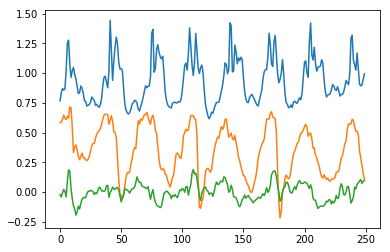

In [27]:
plt.plot(XXX[3291])
plt.plot(YYY[3291])
plt.plot(ZZZ[3291])
plt.show()

In [28]:
ver_proj = np.asarray([i[0] for i in HR])
hor_proj = np.asarray([i[1] for i in HR])

In [29]:
exec(open('Important_Function_For_Deep/butterFilter.py').read())

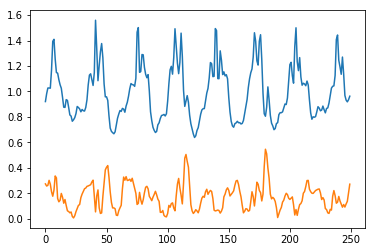

In [30]:
plt.plot(ver_proj[3291])
plt.plot(hor_proj[3291])
plt.show()

## Data smoothing

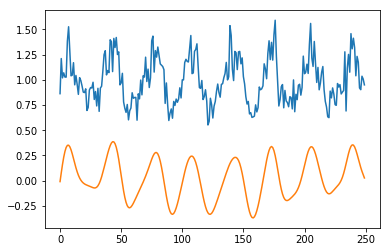

In [31]:
ver_with_noise = ver_proj[3291] + np.random.normal(0,0.1,250)
plt.plot(ver_with_noise)
plt.plot(denoise2(ver_with_noise))
plt.show()

## Wavelet transform

In [32]:
exec(open('Other/WavTransform.py').read())

Doing toDWT
relative wavelet
cont wavelet
Doing toDWT
relative wavelet
cont wavelet


## Feature extraction

In [33]:
pd.DataFrame(TagLow1).head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,9.593021e-16,0.008887,0.012497,0.051159,0.085867,0.137895,0.255462,0.284079,0.220722,8.881784e-16,...,0.100659,2.220446e-16,0.100702,0.033950,0.116604,0.175272,0.206062,0.160170,0.168032,0.117767
1,2.649790e-16,0.007488,0.035111,0.020595,0.143358,0.143707,0.234723,0.298782,0.200575,2.220446e-16,...,0.131683,0.000000e+00,0.145591,0.040045,0.177972,0.148233,0.167909,0.185595,0.119198,0.092254
2,5.967449e-16,0.015985,0.037174,0.043307,0.190934,0.222434,0.341245,0.363287,0.298509,4.440892e-16,...,0.196522,0.000000e+00,0.101844,0.070220,0.139487,0.217634,0.194407,0.140085,0.115682,0.097555
3,2.068766e-15,0.001384,0.022019,0.065798,0.172655,0.383713,0.483152,0.514084,0.384454,1.110223e-15,...,0.164729,2.220446e-16,0.020505,0.210380,0.112032,0.283788,0.166326,0.111230,0.109441,0.077702
4,1.344411e-16,0.011787,0.060468,0.051577,0.120319,0.329766,0.397924,0.504151,0.395383,2.220446e-16,...,0.164675,0.000000e+00,0.059514,0.063155,0.149357,0.210909,0.202925,0.168451,0.107356,0.118386


## Features relations to symptoms 

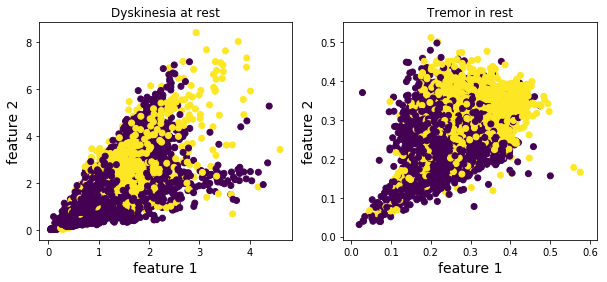

In [34]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
axs[0].scatter(np.asarray(contVer)[meta['TaskClusterId'].as_matrix() == '5',7],np.asarray(contVer)[meta['TaskClusterId'].as_matrix() == '5',5],c=meta.DyskinesiaGA.as_matrix()[meta['TaskClusterId'].as_matrix() == '5'])
axs[0].set_title('Dyskinesia at rest')
axs[0].set_xlabel('feature 1', fontsize=14)
axs[0].set_ylabel('feature 2', fontsize=14)

axs[1].scatter(np.asarray(relVer)[meta['TaskClusterId'].as_matrix() == '1',6],np.asarray(relVer)[meta['TaskClusterId'].as_matrix() == '1',7],c=meta.TremorGA.as_matrix()[meta['TaskClusterId'].as_matrix() == '1'])
axs[1].set_title('Tremor in rest')
axs[1].set_xlabel('feature 1', fontsize=14)
axs[1].set_ylabel('feature 2', fontsize=14)
plt.show()

## Deep learning auto-encoder

In [35]:
import Image
import matplotlib.image as mpimg

In [36]:
Original_image = mpimg.imread('Images_here/Original_image.png')
reconstraction = mpimg.imread('Images_here/reconstraction.png')
Delta = mpimg.imread('Images_here/Delta.png')

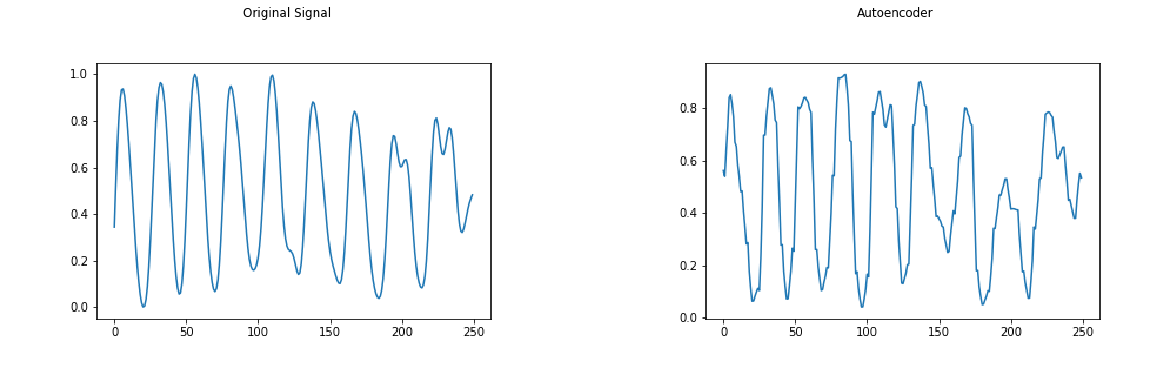

In [37]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 20))
axs[0].imshow(Original_image)
axs[0].set_title("Original Signal")
axs[1].imshow(reconstraction)
axs[1].set_title("Autoencoder")
axs[0].axis('off')
axs[1].axis('off')

plt.show()

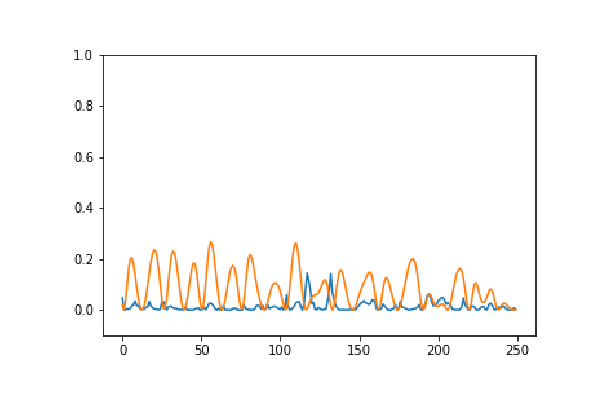

In [38]:
plt.figure(figsize=(10,10))
plt.imshow(Delta)
plt.axis('off')
plt.show()